<a href="https://colab.research.google.com/github/pedroAndrad1/deep_learning/blob/master/intro_deep_learning_fashion_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explorando o Dataset

        Aqui vamos estudar deep learning que é uma ramificação do machine learning. No machine learning, para classificar itens, tínhamos um dataset com as varíaveis dos itens. Por exemplo, numa situação em que desejamos classificar animais entre porco e cachorro, teriámos uma dataset que diria se o animal late, tem pata curta, comprimento dos pelos etc. Mas imagine fazer isso para classificar imagens de roupas. Existem centenas de características para uma roupa. Isso dificulta muito o processo.

        No deep learning, ao invés de utilizarmos essas características previamente ditas, utilizamos funções matemáticas para extrair essas características da imagem. Aqui usaremos um dataset muito famoso, o fashion_mnist. Muito recomendado para deep learning. Neste daset há setenta mil imagens de roupas de uma loja alemã chamada zalango. Todas as imagens estão em um formato de 28 x 28 pixels.

        Utilizaremos a biblioteca Keras para a nossa modelagem e aprendizado. Esta biblioteca roda em cima de outra biblioteca chamada TensorFlow. Para facilitar o trabalho, usaremos o Keras que é mais alto nível que o TensorFlow. Mas lembre-se, quanto mais alto nível, menos controle temos sobre o que está acotecendo por de baixo dos panos.

Docs:

https://www.tensorflow.org

https://keras.io

In [0]:
from tensorflow import keras

#O dataset que sera usado ja esta dentro do keras.
#O que faz sentido, visto que ele e tao famoso e usado.

#Aqui ainda nao carregamos o dataset, so damos o endereco dele.

fashion_mnist = keras.datasets.fashion_mnist

#Para carregar o dataset, usaremos a funcao load_data() do objeto que recebemos acima.
#Esta funcao nos retorna uma 2-tupla cada elemento dessa tupla tambem sao 2-tupla.
#Esses elementos ja sao o nosso dataset splitado em treino e teste. 
#E retornado o seguinte: ( (x_treino, y_treino) , (x_teste, y_teste) ).
#Por default, e splitado, nesse caso, 60000 para treino e 10000 para teste.
#Nao sei como funciona para outros datasets, so lendo a documentacao.

#Obs: Tentei receber o retorn da funcao usando
#x_treino, y_treino, x_teste, y_teste, como no retorno do train_test_split.
#Nao deu certo, tem que usar tuplas mesmo.
#Mas depois da pra chamar cada variavel individualmente.

(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

Com o dataset em mão, vamos dar uma olhada em seu conteúdo. Vamos ver o que tem no x_treino.

In [0]:
x_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Vemos que é um array de varíos, mas precisamente 60000, arrays de 28 por 28. Estes arrays representam as nossas imagens. Cada array tem 28 por 28 porque cada imagem é de 28 x 28 pixels.

In [0]:
x_treino.shape

#Vendo o atributo shape, vemos essas informacoes.
#O primeiro elemento diz que o length do array e de 60000.
#A segunda e terceria informacoes dizem que cada elemento de 28x28.

(60000, 28, 28)

Mas so temos numeros que representam uma imagem. Vamos usar entao o modulo plyplot da biblioteca matplotlib para plotar essas informacoes como uma imagem.

docs:

https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

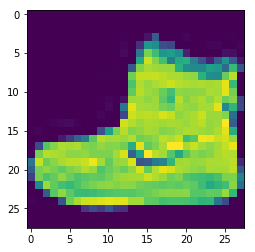

In [0]:
import matplotlib.pyplot as plt

#Passaremos um elemento do x_treino para a funcao imshow do plt
#para esta plotar uma imagem.

plt.imshow(x_treino[0])

Vamos agora explorar nossas classes.

In [0]:
y_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Opa, esperávamos que nossas classes fossem nomes como camise, tênis etc. Acontece que o dataset usa números para identificar as classes e tem uma legenda na documentação:

https://github.com/zalandoresearch/fashion-mnist

Esta é a legenda:

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

Vamos então criar um array com as os nomes das classes.


In [0]:
y_nomes = ["T-shirt/top", "Trouser", "Pullover", " Dress", "Coat", "Sandal", "Shirt", "Sneaker", " Bag", "Ankle boot" ]

Feito isso, vamos imprimir um conjunto de imagens usando a função subplot() do plt. 
Esta função recebe como parametrô o número de linhas, de colunas e o último é um idenx para posicionar cada imagem.Também vou usar a função title para dar um título a cada imagem.

docs:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html

Vou usar um for para iterar pelo x_treino e y_treino e plotar os elementos.

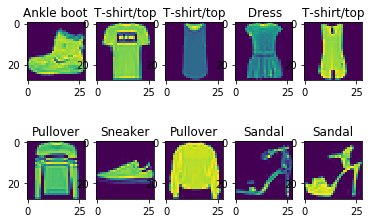

In [0]:
for imagens in range(10):
  #Serao duas linhas e 5 colunas
  plt.subplot(2,5, imagens+1)
  #Plotando a imagem
  plt.imshow(x_treino[imagens])
  #Dando um titulo para a imagem.
  #O titulo sera a String na posicao da classe no array y_nomes.
  plt.title(y_nomes[ y_treino[imagens] ])

#Costruindo o modelo

Antes, machine learning, tínhamos 3 elementos: A entrada, o processamento e a saída. A entrada eram as nossas features, o processamento era o modelo e a sáida eram os predict's que o modelo dava. 

Aqui, nosso modelo incorporá estes três elementos. Estas serão as camadas do modelo. Usaremos um modelo sequencial do Keras, keras.Sequential.

docs:

https://keras.io/getting-started/sequential-model-guide/

#Camada 0

Nesta camada estão os primeiros neurônios que terão contato com o input, aqui vamos dizer qual é o shape (formato) das entradas com as quais o modelo vai trabalhar. 

Camada em inglês é layer, e o Keras possui várias camadas, então escreveremos layers.

Para transformarmos a nossa imagem de 28 x 28px em um array de 1 dimensão, com todos esses 28, 28 pixels, que serão a entrada, iremos fazer um achatamento para as dimensões vetoriais. Isso em inglês fica Flatten, então usaremos keras.layers.Flatten, e como é uma função, abriremos e fecharemos parênteses, passando as nossas imagens de entrada para dentro dessa primeira camada, ou camada 0.

Note na documentação da funçao Sequential que há várias formas além desta de cosntruir a camada 0.

docs:

https://keras.io/layers/core/

In [0]:
camada0 = keras.layers.Flatten( input_shape = (28,28) )

#Camada 1

        Aqui estarão a segunda linha de neurônios que estarão densamente conectados com os neurônios da camada anterior, ou seja, cada neurônio estará conectado com todos os n neurônios da camada anterior.

        Aqui precisamos dizer quantos neurônios terão nessa camada. Ainda não sei se há uma forma de dizer quantos neurônios nesta camda é o ideal para uma melhor performance do modelo, além da tentativa e erro. 

        Além disso, precisamos passar como parâmetro a função de ativação desses neurônios.
        
        Aqui usaremos a função Dense do módulo layers da biblioteca Keras para criar essa camada. A função Dense recebe como parâmetro o número de neurônios que a camada terá, é sempre bom usar um múltiplo de 2, e a função de ativação que nesse caso será a a relu do módulo nn(Neural Networks) da biblioteca TensorFlow. A função Dense tem vários outros possíveis parâmetros interessantes. Recomendo ler a documentação no link abaixo.
        

Docs:

https://keras.io/layers/core/

https://www.tensorflow.org/api_docs/python/tf/nn/relu

        A documentação do relu não me diz nada sobre como este funciona. Então vou escrever aqui o que eu sou sobre o relu. O relu é uma função de ativação não linear, a qual qualquer  entrada negativa é jogada em 0 e as entradas positivas continuam positivas,mas não necessariamente iguais. A não linearidade é um fator muito interessante pois eu não consigo pensar em uma forma de traçar uma reta que divide todas as nossas 10 classes. Conceitualmete, o relu vai procurar entender os contornos das imagens. Fonte: Curso Deep learning parte 1 do alura, aula 3.





In [0]:
import tensorflow

#Chutei 256 neuronios, porque sei la.
camada1 = keras.layers.Dense(256, tensorflow.nn.relu )

W0714 04:26:27.473778 140017093851008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#Camada 2

Aqui teremos a última camada de neurônios que estarão também densamente conectados aos neurônios da camada anterior. A função de ativação aqui era a softmax. Como também a documentação dessa função não diz como ela funciona. Direi o que sei sobre ela: O softmax vai calcular as probabilidades de um dado item ser de cada classe, as probabilidades estarão na forma de números entre 0 e 1. Se a soma dessas probabilidades for igual a 1, então ele classifica o item como da classe da probabilidade mais alta. Não sei o que ele faz caso a soma não seja igual a 1. :( Fonte: Curso de Deep Learnig do alura, aula 3.


In [0]:
#Vou chutar 10 neuronios aqui, pra ir afunilando.
camada2 = keras.layers.Dense(10, tensorflow.nn.softmax )

#Multi-Camadas vs Deep Learning

Há uma discussão se esse modelo poderia ser considerado Deep Learning. Alguns dizem que ele poderia ser considerado Deep Learning porque deveriam haver camadas intermediárias entre a camada 1 e 2, e que na verdade esse modelo seria um multicamada. Outros dizem que isso é deep learning. Uma discussão conceitual.

#Compilando o modelo

Diferente de como é feito no machine learning, não podemos ainda dizer para o nosso modelo dar um fit com os nossos dados e fazer os predict's. O modelo tem uma função chamada compile. Esta função receberá dois parâmetros: optimizer e loss. O optimizer e qual otimizador será usado para o aprendizado e o loss é de que forma a perda de informação será calculado. Existem vários otimizadores e varías formas de se calcular a perda. O otimizador tem a função de regular os pesos de cada entrada nos neurônios para reduzir ao máximo a perda.

Useremos a adam como otimizador e usaremos o sparse_categorical_crossentropy.

fonte: https://blog.algorithmia.com/introduction-to-optimizers/



In [0]:
#Antes precisamos instanciar o modelo kk.
#O Sequential recebe as camadas por meio de uma lista.
modelo = keras.Sequential( [camada0, camada1, camada2 ])

#Compilando o model
modelo.compile('adam', 'sparse_categorical_crossentropy')

#Agora sim podemos dar um fit

modelo.fit(x_treino, y_treino)

#A genre pode ver na saida qual foi a perda do modelo, quantas instancias foram
#treinadas e quanto tempo levou no total e para cada instancia na media.

60000/60000 [==============================] - 5s 81us/sample - loss: 3.9618


#Normalização

Como podemos diminuir a perda do modelo? Vamos focar na camada 0. Ela recebe os pixe's da imagem. Cada pixel tem um valor que representa uma cor. Vamos ver como esse valor varia.

Vou plotar uma barra de cores pra uma das imagens do dataset usando a função colorbar do plt.

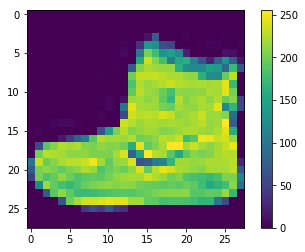

In [0]:
plt.imshow(x_treino[0])
plt.colorbar()

Vemos que esses números que representam as cores variam de 0 a 250. Essa é uma variação grande. Vamos fazer com que esses valores variem entre 0 e 1. Como? Simplesmente divindo o x_treino por 250.0. O ".0" e para transformar o resultado em floar's pois a divisão de int por float é igual a float. 

In [0]:
x_treino = x_treino/250.0

modelo.fit(x_treino, y_treino)

60000/60000 [==============================] - 5s 79us/sample - loss: 0.8849


Podemos perceber uma diminuição da perda. Vamos adicioanar mais camadas entre a 1 e a 2 para ver se temos um redução da perda.

In [0]:
#Vou adicionar mais camadas com a mesma funcao de ativacao da camada 1, mas
#como menos neuronios. Para ir afunilando.
modelo_teste = keras.Sequential( [keras.layers.Flatten(input_shape = (28, 28) ),
                            keras.layers.Dense(256, activation = tensorflow.nn.relu),
                            keras.layers.Dense(128, activation = tensorflow.nn.relu),
                            keras.layers.Dense(64, activation = tensorflow.nn.relu),
                            keras.layers.Dense(10, activation = tensorflow.nn.softmax) ])

#Vamos dar um compile e ver a perda
modelo_teste.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
modelo_teste.fit(x_treino, y_treino)

60000/60000 [==============================] - 6s 101us/sample - loss: 0.4841


Curiosamente tivemos uma redução da perda kk. Não estava esperando por isso :). 

Vamos ver a accuracy do modelo agora. Para isso, vamos passar mais um parâmetro quando usamos a função compile() que o parâmetro metrics, este recebe uma lista com as métricas que serão calculadas e exibidas. Vou passar só a accuracy.

In [0]:
modelo_teste.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
modelo_teste.fit(x_treino, y_treino)

60000/60000 [==============================] - 6s 104us/sample - loss: 0.3686 - acc: 0.8649


Agora vou os introduzir ao conceito de época. Perceba que treinamos uma vez que com todas as 60000 features de treino. Isso é uma epoch (época), um ciclo de treinamento. Mas como na vida, esperamos melhorar conforme treinamos mais. Vamos adicionar mais epócas passando como parâmetro o epochs e igualando a um inteiro, que será o número de épocas, na função fit().

In [0]:
modelo_teste.fit(x_treino, y_treino, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3278 - acc: 0.8788
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3063 - acc: 0.8867
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2832 - acc: 0.8949
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2713 - acc: 0.8979
Epoch 5/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2593 - acc: 0.9021


Perceba que a cada época a perda caiu e a acurácia ficou melhor. Mas acredito que não seja só colocar infinitas épocas que obteremos um modelo perfeito. Isso só deve funcionar até certo ponto. Mas isso é só o que minha intuição diz.

Vamos agora ver a acurácia  e perda do modelo como os dados de teste. Usando a função evaluate do modelo. Esta função recebe o x_teste e y_teste e retorna uma lista onde o primeiro elemento é a perda e o segundo elemento é a acurácia, 

In [0]:
loss, accuracy = modelo_teste.evaluate(x_teste, y_teste)

#Nem foi preciso printar as variaveis, as informacoes ja estao no output :)

10000/10000 [==============================] - 0s 46us/sample - loss: 55.4932 - acc: 0.8416


Pode-se perceber que a perda está muito grande e acurácia não. Vamos separar um 20% das features para validação. A validação é um teste no modelo enquanto treinamos. 

Para fazer isso, basta passar mais um parâmetro a função fit(), validation_split. Este recebe um número entre 0 e 1 que representa a porcentagem para validação.

In [0]:
#Vou separar 20% do treino para vavlidacao
modelo_teste.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2474 - acc: 0.9075 - val_loss: 0.2465 - val_acc: 0.9078
Epoch 2/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2341 - acc: 0.9126 - val_loss: 0.2626 - val_acc: 0.9030
Epoch 3/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2267 - acc: 0.9145 - val_loss: 0.2565 - val_acc: 0.9065
Epoch 4/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2206 - acc: 0.9175 - val_loss: 0.2759 - val_acc: 0.9017
Epoch 5/5
48000/48000 [==============================] - 5s 109us/sample - loss: 0.2131 - acc: 0.9192 - val_loss: 0.2655 - val_acc: 0.9014


Perceba no output a perda e a acurácia nos testes de validação.

Agora, vamos salvar esses dados em uma variável. A função fit retorna um objeto keras.History. Que é um dicionário com as valores de perda, acurácia, perda na validação e acurácia na validação, seperados por época.

docs:
https://keras.io/visualization/

In [0]:
history = modelo_teste.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)
history.history

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2034 - acc: 0.9205 - val_loss: 0.2791 - val_acc: 0.8980
Epoch 2/5
48000/48000 [==============================] - 5s 110us/sample - loss: 0.1994 - acc: 0.9232 - val_loss: 0.2547 - val_acc: 0.9041
Epoch 3/5
48000/48000 [==============================] - 5s 113us/sample - loss: 0.1914 - acc: 0.9270 - val_loss: 0.2695 - val_acc: 0.9018
Epoch 4/5
48000/48000 [==============================] - 5s 110us/sample - loss: 0.1850 - acc: 0.9294 - val_loss: 0.2727 - val_acc: 0.9021
Epoch 5/5
48000/48000 [==============================] - 5s 107us/sample - loss: 0.1811 - acc: 0.9309 - val_loss: 0.2633 - val_acc: 0.9056


{'acc': [0.9204792, 0.9231875, 0.92702085, 0.92941666, 0.93085414],
 'loss': [0.20338594923106332,
  0.19935254284925757,
  0.1914117518029331,
  0.18495286664925514,
  0.18111705643124879],
 'val_acc': [0.898, 0.9040833, 0.90183336, 0.90208334, 0.9055833],
 'val_loss': [0.27914700865745545,
  0.2546943483302991,
  0.2695263684888681,
  0.27273726669947307,
  0.26325532160202664]}

Vamos usar essas informações para plotar dois gráficos. Um que vai comparar a acúracia no treino e acurácia na validação e outro que vai comparar a perda no treino e a perda na validação.

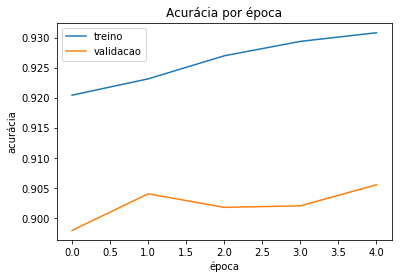

In [0]:
#Plotando a linha de acuracia no treino, selecionando pelo dicionario.
plt.plot(history.history['acc'])
#Plotando a linha de acuracia na validacai, selecionando pelo dicionario.
plt.plot(history.history['val_acc'])
#Dando um titulo ao grafico
plt.title("Acurácia por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("acurácia")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])


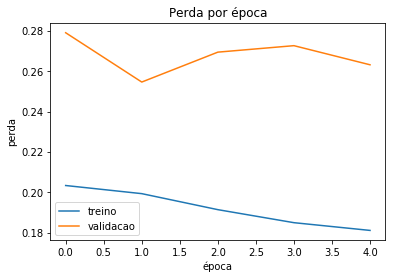

In [0]:
#Plotando a linha de perda no treino, selecionando pelo dicionario.
plt.plot(history.history['loss'])
#Plotando a linha de perda na validacao, selecionando pelo dicionario.
plt.plot(history.history['val_loss'])
#Dando um titulo ao grafico
plt.title("Perda por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("perda")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])

 #Dropout       
        
        
        Podemos perceber que a acurácia de treino está muito maior que a acurácia de validação e que a perde no treino está muito menor do que a perda na validação. 

        Isso indica que nosso modelo está tendo um overfitting, ou seja, ele está se ajustando tão bem aos dados de treino que não está conseguindo generalizar. Logo, está apenas memorizando os dados.
        
        Para resolver isso, usaremos mais uma técnica de validação chamada Dropout. Que consiste em adormecer uma parte dos neurônios de cada camada, menos a primeira e a última, a cada época. Geralmente o recomendado é 20%. Então usamos o keras.layers.Dropout depois de cada camada, passado como parâmetro 0.2 que significa 20%.

In [0]:
modelo_drop = keras.Sequential( [keras.layers.Flatten(input_shape = (28, 28) ),
                            keras.layers.Dense(256, activation = tensorflow.nn.relu),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = tensorflow.nn.relu),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation = tensorflow.nn.relu),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(10, activation = tensorflow.nn.softmax) ])

modelo_drop.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = modelo_drop.fit(x_treino, y_treino, validation_split = 0.2, epochs = 5)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 127us/sample - loss: 0.6188 - acc: 0.7792 - val_loss: 0.4485 - val_acc: 0.8370
Epoch 2/5
48000/48000 [==============================] - 6s 122us/sample - loss: 0.4432 - acc: 0.8396 - val_loss: 0.3750 - val_acc: 0.8591
Epoch 3/5
48000/48000 [==============================] - 6s 119us/sample - loss: 0.4035 - acc: 0.8545 - val_loss: 0.3859 - val_acc: 0.8607
Epoch 4/5
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3824 - acc: 0.8618 - val_loss: 0.3622 - val_acc: 0.8652
Epoch 5/5
48000/48000 [==============================] - 6s 115us/sample - loss: 0.3656 - acc: 0.8664 - val_loss: 0.3502 - val_acc: 0.8709


In [0]:
history.history

{'acc': [0.77916664, 0.8395625, 0.85445833, 0.8618125, 0.86639583],
 'loss': [0.6188010673224926,
  0.44316688978672025,
  0.40350783470273016,
  0.38236395016809305,
  0.36561419699092707],
 'val_acc': [0.837, 0.85908335, 0.8606667, 0.86525, 0.87091666],
 'val_loss': [0.44846864263216657,
  0.37504004061222074,
  0.3858725297053655,
  0.362197007060051,
  0.35017156213521955]}

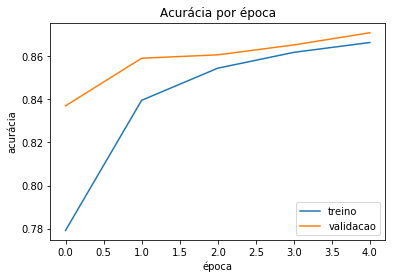

In [0]:
#Plotando a linha de acuracia no treino, selecionando pelo dicionario.
plt.plot(history.history['acc'])
#Plotando a linha de acuracia na validacao, selecionando pelo dicionario.
plt.plot(history.history['val_acc'])
#Dando um titulo ao grafico
plt.title("Acurácia por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("acurácia")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])

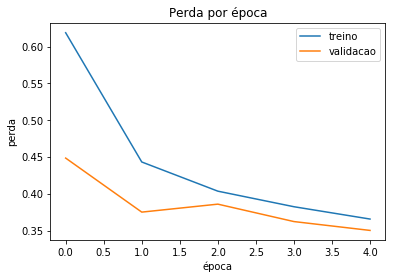

In [0]:
#Plotando a linha de perda no treino, selecionando pelo dicionario.
plt.plot(history.history['loss'])
#Plotando a linha de perda na validacao, selecionando pelo dicionario.
plt.plot(history.history['val_loss'])
#Dando um titulo ao grafico
plt.title("Perda por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("perda")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])

Podemos ver que agora o comportamento das linhas de treino e de validação estão bem parecidos, isso quer dizer que não está acontecendo mais o overfitting.

#Salvando o modelo

Para salvar o modelo, usamos a função do save do keras e para carregarmos um modelo usamos a função load_model. A função save recebe como parâmetro o nome do arquivo e a extensão h5 que é de HDF5.

Para usar o load_model, você tem que importar essa função de tensorflow.keras.models

In [0]:
modelo_drop.save('intro_deeplearning_modelo.h5')